# Labb 2

**Syftet** med den här laborationen är att använda verktygen vi lärt oss i Python för att implementera en
förenklad maskininlärningsalgoritm.

I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. Man ska skapa en
algoritm, som baserat på den givna datan, kana avgöra om en ny datapunkt ska klassificeras som Pichu
eller Pikachu.

### Split data into datapoints (datapoints and testpoints)

In [3]:
pokemon_data = []
# Read data from files and split
# Datapoints look like this: 21.959384499160468, 31.23956701424158, 0
with open("Data/datapoints.txt", "r") as data_read:
    lines = data_read.readlines()[1:] 
    for line in lines:
        parts = line.strip().split(", ")
        width = float(parts[0])
        height = float(parts[1])
        pokemon_type = int(parts[2])
        pokemon_data.append([width, height, pokemon_type])  # Use lists instead of tuples

# Separate data into Pichus and Pikachus
pichu_data = [data[:3] for data in pokemon_data if data[2] == 0]
pikachu_data = [data[:3] for data in pokemon_data if data[2] == 1]

# Create separate lists for Pichus and Pikachus
#countries = [e[0] for e in x], https://stackoverflow.com/questions/28589583/how-to-make-a-new-list-of-first-elements-from-existing-list-of-lists

# Create separate lists for Pichus and Pikachus
pichu_width = [data[0] for data in pichu_data]
pichu_height = [data[1] for data in pichu_data]
pikachu_width = [data[0] for data in pikachu_data]
pikachu_height = [data[1] for data in pikachu_data]

# Read data from file and split
# Testpoints look like this: 1. (25, 32)
test_points = []
with open("Data/testpoints.txt", "r") as test_read:
    for line in test_read:
        line = line.strip()
        if "(" in line and ")" in line:
            coordinates = line.split("(")[1].split(")")[0]
            x, y = [float(coordinate) for coordinate in coordinates.split(",")]
            test_points.append([x, y]) 

# Create separate list for x and y in testpoints 
x_coordinates = [data[0] for data in test_points]
y_coordinates =[data[1] for data in test_points]
# https://www.pythonforbeginners.com/files/the-fastest-way-to-split-a-text-file-using-python
# https://www.geeksforgeeks.org/python-rear-element-extraction-from-list-of-tuples-records/

print(f"\n{pokemon_data[:2] =}...")
print(f"\n{pichu_data[:2] =}...")
print(f"\n{pikachu_data[:2] =}...")
print(f"\n{test_points[:2] =}...")


pokemon_data[:2] =[[21.959384499160468, 31.23956701424158, 0], [23.63591632187622, 36.46821490673444, 1]]...

pichu_data[:2] =[[21.959384499160468, 31.23956701424158, 0], [17.714056417303343, 31.44170391314962, 0]]...

pikachu_data[:2] =[[23.63591632187622, 36.46821490673444, 1], [21.78020031891186, 33.213397759738264, 1]]...

test_points[:2] =[[25.0, 32.0], [24.2, 31.5]]...


### Plotting datapoints and testpoints

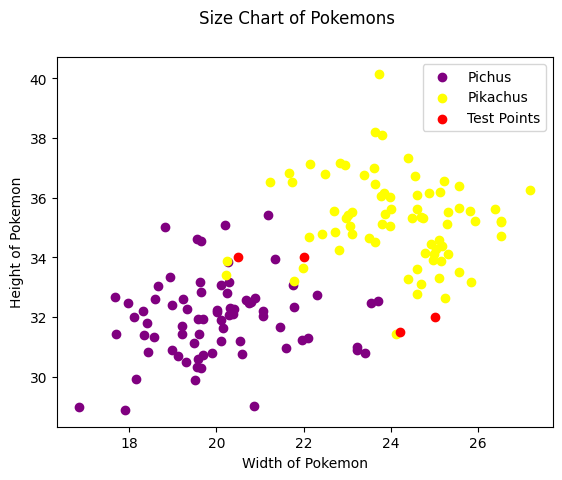

In [10]:
import matplotlib.pyplot as plt
 # Plotting Pichus
plt.scatter(pichu_width, pichu_height, marker='o', label= 'Pichus', color= 'purple')
 # Plotting Pikachus
plt.scatter(pikachu_width, pikachu_height, marker='o', label= 'Pikachus', color= 'yellow')
 # Plotting testpoints
plt.scatter(x_coordinates, y_coordinates, marker='o', label='Test Points', color='red')

# Adding titles and labels
plt.suptitle("Size Chart of Pokemons")
plt.xlabel("Width of Pokemon")
plt.ylabel("Height of Pokemon")

# Adding the legend for both Pichus, Pikachus and test points
plt.legend()

# Display the plot
plt.show()

### Classification of the closest pokemon 

In [11]:
import math

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Loop through each test point
for test_point in test_points:
    closest_pokemon = None
    min_distance = 999999
    
    # Loop through each Pichu and Pikachu data point
    for pokemon_point in pokemon_data:
        distance = euclidean_distance(test_point, pokemon_point)
        if distance < min_distance:
            min_distance = distance
            closest_pokemon = pokemon_point
    
    # Check the classification of the closest pokemon and print the result
    if closest_pokemon[2] == 0:
        print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pichu")
    else:
        print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pikachu")


# https://www.w3resource.com/python-exercises/python-basic-exercise-40.php

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


## Task 1

Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.

In [21]:
import math

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

K = 1  # Set K to 1 to find the single closest point in Pokemon_data


user_test_point = []
distances = []

try:
    user_width = float(input("Enter the width: "))
    user_height = float(input("Enter the height: "))

    if user_width < 0 or user_height < 0:  # Check if either is negative
        print("Error: Width and height must be non-negative.")
    else:
        user_test_point.append([user_width, user_height])  # Append inside the 'else' block

        # Loop through each Pichu and Pikachu data point
        for pokemon_point in pokemon_data:
            distance = euclidean_distance(user_test_point[0], pokemon_point)
            distances.append(distance)

        # Find the index of the smallest distance with min() https://stackoverflow.com/questions/55189626/how-do-i-find-the-index-of-the-smallest-number-in-an-array-in-python-if-i-have-m
        min_distance_index = distances.index(min(distances))

        # Check the classification of the closest pokemon and print the result
        closest_pokemon = pokemon_data[min_distance_index]
        if closest_pokemon[2] == 0:
            print(f"Sample with (width, height): ({user_width}, {user_height}) classified as Pichu")
        else:
            print(f"Sample with (width, height): ({user_width}, {user_height}) classified as Pikachu")

except ValueError:
    print("Error: Please enter a numeric value.")

#######################################################

print(f"{closest_pokemon =} (0 = Pichu, 1 = Pikachu)")
print(f"Amount of distances calculated: {len(distances)}")


Sample with (width, height): (24.0, 32.0) classified as Pikachu
closest_pokemon =[24.111063562798908, 31.418267572382227, 1] (0 = Pichu, 1 = Pikachu)
Amount of distances calculated: 150


## Task 2 
Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive
klass går in i varandra. Nu ska du istället välja de tio närmaste punkterna till din testpunkt. Den klass
testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna.

In [22]:
import math

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

K = 10  # Set K to 10 to find the 10 closest point in Pokemon_data


user_test_point = []
distances = []

try:
    user_width = float(input("Enter the width: "))
    user_height = float(input("Enter the height: "))

    if user_width < 0 or user_height < 0:  # Check if either is negative
        print("Error: Width and height must be non-negative.")
    else:
        user_test_point.append([user_width, user_height])  # Append inside the 'else' block

        # Loop through each Pichu and Pikachu data point
        for pokemon_point in pokemon_data:
            distance = euclidean_distance(user_test_point[0], pokemon_point)
            distances.append(distance)

        #Find the indices of the K smallest distance  
        indices = []
        for _ in range(K):
            min_distance_index = distances.index(min(distances))
            indices.append(min_distance_index)
            distances[min_distance_index] = float('inf') #infinity https://flexiple.com/python/python-infinity
        
        # Count the votes for Pichu and Pikachu
        pichu_votes = 0
        pikachu_votes = 0
        for index in indices:
            closest_pokemon = pokemon_data[index]
            if closest_pokemon[2] == 0:
                pichu_votes +=1
            else:
                pikachu_votes += 1

        # Check the votes and classify the closest pokemon and print the result
        closest_pokemon = pokemon_data[indices[0]]
        if pichu_votes == pikachu_votes and closest_pokemon[2] == 0:
            print(f"Sample with (width, height): ({user_width}, {user_height}) is most likely Pichu")

        elif pichu_votes == pikachu_votes and closest_pokemon[2] == 1:
            print(f"Sample with (width, height): ({user_width}, {user_height}) is most likely Pikachu")

        elif pichu_votes > pikachu_votes:
            print(f"Sample with (width, height): ({user_width}, {user_height}) classified as Pichu")

        else:
            print(f"Sample with (width, height): ({user_width}, {user_height}) classified as Pikachu")

except ValueError:
    print("Error: Please enter a numeric value.")

print(f"The votes for Pichu where: {pichu_votes}\nThe votes for Pikachu where: {pikachu_votes}")

Sample with (width, height): (24.0, 32.0) is most likely Pikachu
The votes for Pichu where: 5
The votes for Pikachu where: 5


## Bonusuppgifter

### 3. Dela in ursprungsdatan slumpmässigt så att:
 - 100 är träningsdata (50 pichu, 50 pikachu)
 - 50 är träningsdata (25 pichu, 25 pikachu)

### 4. Beräkna noggranheten genom följande formel:
**accuracy = (#TP-#TN)/total**

In [28]:
import random

random.shuffle(pichu_data)
random.shuffle(pikachu_data)

test_set = pichu_data[:25] + pikachu_data[:25]
training_set = pichu_data[25:] + pikachu_data[25:]
print(f"{len(test_set) = }")
print(f"{len(training_set) = }")

len(test_set) = 50
len(training_set) = 100


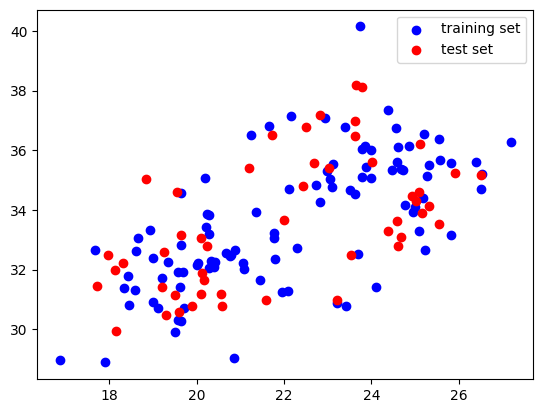

In [37]:
import matplotlib.pyplot as plt

# Create separate list for x and y in test set and training set
train_x = [data[0] for data in training_set]
train_y = [data[1] for data in training_set]
test_x = [data[0] for data in test_set]
test_y = [data[1] for data in test_set]

# Plotting points for training set and test set
plt.scatter(train_x, train_y, marker ='o', label = 'training set', color = 'blue')
plt.scatter(test_x, test_y, marker ='o', label = 'test set', color = 'red')
plt.legend()
plt.show()

In [ ]:
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Repeat 10 times
for _ in range(10):